## Importando Librerias Necesarias

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import matplotlib.font_manager

In [3]:
plt.rcParams.update({'font.family':'sans-serif','font.size':14})

## Importando Dataset y Preprocesamiento

In [4]:
df = pd.read_csv('data/Mercadolibre18-21-es.csv')
df.head()

,Anyo,Fecha,Plataforma,Region,Departamento,Municipio,Transportadora,Categoria,Productos,Cantidad,Descuento,Venta,Profit
0,Dieciocho,2/01/2018,MercadoLibre,Amazonia,Vaupes,Yavarate,Envia-3,Industrial,Impresoras,1,0.0,937800.0,412632.00
1,Dieciocho,3/01/2018,MercadoLibre,Pacifica,Valle del Cauca,Cali,Servientrega+3,Electrodomesticos,Neveras,2,0.2,1915136.0,102952.80
2,Dieciocho,3/01/2018,MercadoLibre,Andina,Bogota,Bogota DC,Envia+4,Industrial,Drones,3,0.0,1111880.0,103207.60
3,Dieciocho,3/01/2018,MercadoLibre,Caribe,Atlantico,Galapa,Envia+4,Electrodomesticos,Neveras,2,0.3,1568232.0,-34423.44
4,Dieciocho,3/01/2018,MercadoLibre,Caribe,Atlantico,Galapa,Envia+4,Equipo para Comercio,Papel Termico,3,0.2,34944.0,11356.80


In [5]:
## Las Ventas y el Profit estan en unidades de Pesos Colombianos (COP)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9495 entries, 0 to 9494
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Anyo            9495 non-null   object 
 1   Fecha           9495 non-null   object 
 2   Plataforma      9495 non-null   object 
 3   Region          9495 non-null   object 
 4   Departamento    9495 non-null   object 
 5   Municipio       9495 non-null   object 
 6   Transportadora  9495 non-null   object 
 7   Categoria       9495 non-null   object 
 8   Productos       9495 non-null   object 
 9   Cantidad        9495 non-null   int64  
 10  Descuento       9495 non-null   float64
 11  Venta           9495 non-null   float64
 12  Profit          9495 non-null   float64
dtypes: float64(3), int64(1), object(9)
memory usage: 964.5+ KB


In [7]:
df.isnull().sum()
## Valores nulos no disponibles en el dataset

Anyo              0
Fecha             0
Plataforma        0
Region            0
Departamento      0
Municipio         0
Transportadora    0
Categoria         0
Productos         0
Cantidad          0
Descuento         0
Venta             0
Profit            0
dtype: int64

## Estadística Descriptiva y Correlación

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Cantidad,9495.0,3.784202,2.228774e+00,1.0,2.0,3.0,5.0,14.0
Descuento,9495.0,0.163464,2.088725e-01,0.0,0.0,0.2,0.2,0.8
Venta,9495.0,457031.797852,1.243269e+06,888.0,34138.0,108768.0,419200.0,45276960.0
Profit,9495.0,80688.703191,3.795063e+05,-1319995.6,2956.8,16431.2,57412.8,16799952.0


In [9]:
df.describe(include=object).transpose()

,count,unique,top,freq
Anyo,9495,4,Veintiuno,3120
Fecha,9495,1226,9/02/2021,36
Plataforma,9495,1,MercadoLibre,9495
Region,9495,5,Andina,5086
Departamento,9495,32,Antioquia,2001
Municipio,9495,271,Bogota DC,1126
Transportadora,9495,4,Envia+4,5680
Categoria,9495,3,Equipo para Comercio,5696
Productos,9495,17,Estanteria,1434


In [10]:
## Los datos corresponden a 4 años de ventas en la plataforma de Mercadolibre
## Los datos cubren todas las regiones, departamentos y municipios de Colombia
## Las compras se envían en 4 diferentes modos de envío
## Los datos están en 3 categorías principales y 17 subcategorías de productos 

In [11]:
corre = df.corr()
corre

,Cantidad,Descuento,Venta,Profit
Cantidad,1.000000,0.011206,0.202120,0.118516
Descuento,0.011206,1.000000,-0.027451,-0.135400
Venta,0.202120,-0.027451,1.000000,0.724658
Profit,0.118516,-0.135400,0.724658,1.000000


In [12]:
## Las ventas tienen una correlación positiva con las ganancias
## Las ventas y las ganancias tienen una correlación negativa con el descuento

<Figure size 864x864 with 0 Axes>

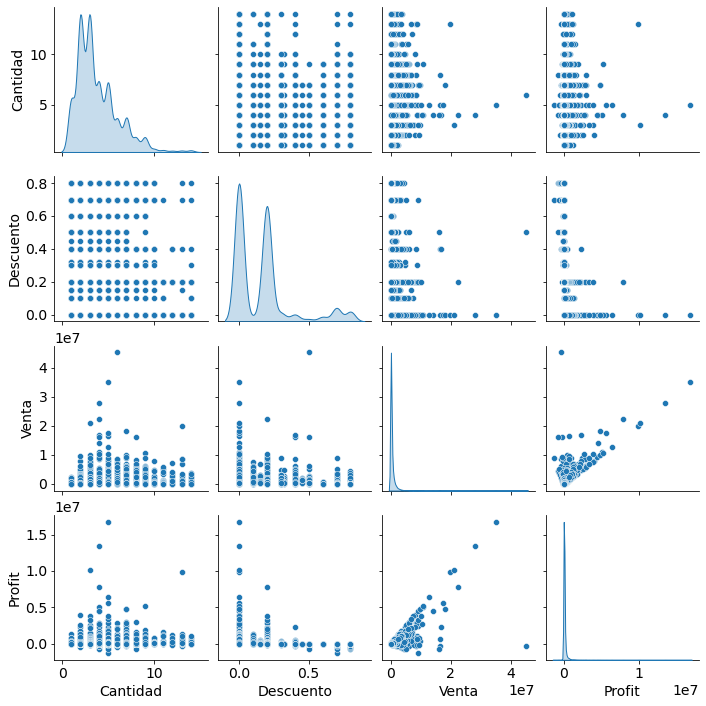

In [13]:
plt.figure(figsize=(12,12))
sns.pairplot(df,diag_kind='kde')
plt.show()

# Análisis Bivariado y Multivariado

## Análisis basado en la Cantidad vendida

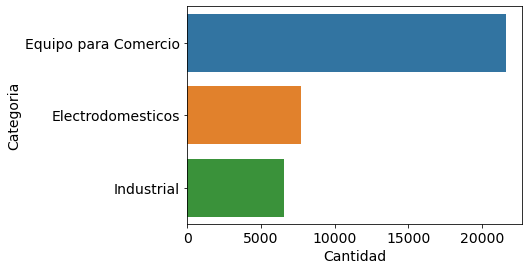

In [14]:
quant_cat = df.groupby(['Categoria']).Cantidad.sum().sort_values(ascending=False)
sns.barplot(x=quant_cat,y=quant_cat.index)
plt.show()

In [15]:
## Equipo para comercio tiene más de 3 veces el recuento de ventas en comparación con las otras dos categorías 

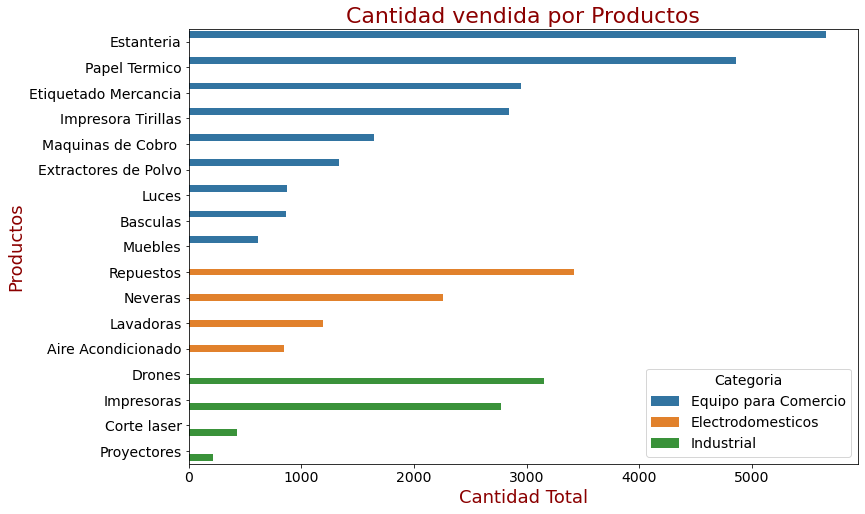

In [16]:
quant_cat_sub = df.groupby(['Categoria','Productos']).Cantidad.sum().reset_index().sort_values(by=['Categoria','Cantidad'], ascending=[True,False], key=lambda x : x.replace({'Equipo para Comercio':1,'Electrodomesticos':2,'Industrial':3}))
plt.figure(figsize=(12,8))
sns.barplot(data=quant_cat_sub,y='Productos',x='Cantidad',hue='Categoria')
plt.title('Cantidad vendida por Productos',fontdict={'fontsize':22,'family':'sans serif','color':'darkred'})
plt.xlabel('Cantidad Total',fontdict={'fontsize':18,'family':'sans serif','color':'darkred'})
plt.ylabel('Productos',fontdict={'fontsize':18,'family':'sans serif','color':'darkred'})
plt.show()

In [17]:
## En el gráfico anterior, podemos ver la cantidad de artículos vendidos por producto

## Las 2 subcategorías principales según la cantidad vendida
## 1) Electrodomesticos       - Repuestos, Neveras
## 2) Equipo para Comercio    - Estantería, Papel Térmico
## 3) Industrial              - Drones, Impresoras

## Descuento !!!!

In [18]:
df_discount = df[df.Descuento != 0]

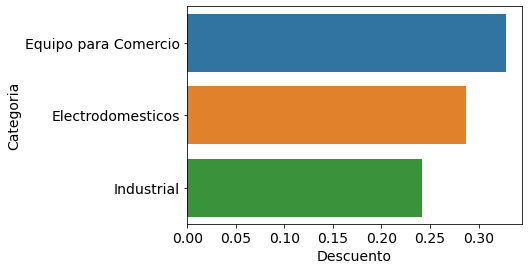

In [19]:
disc_cat = df_discount.groupby('Categoria')['Descuento'].mean().sort_values(ascending=False)
sns.barplot(x=disc_cat,y=disc_cat.index)
plt.show()

In [20]:
## El % de descuento promedio es alto para los productos de "Equipo para Comercio"

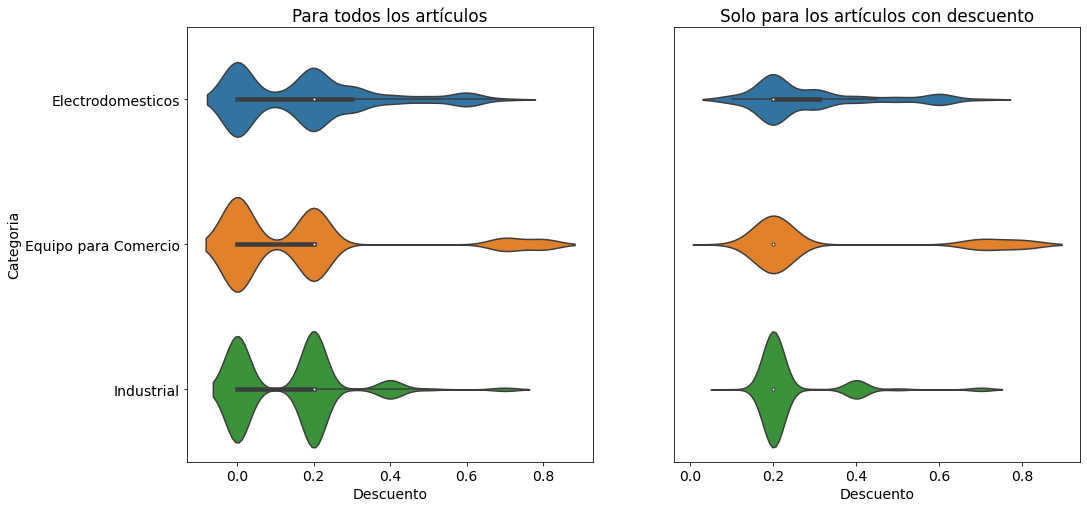

In [21]:
plt.figure(figsize=(16,8))
ax1, ax2 = plt.subplot(1,2,1), plt.subplot(1,2,2)

sns.violinplot(data=df.sort_values(by=['Categoria']),x='Descuento',y='Categoria',inner='box',ax=ax1)
ax1.set_title('Para todos los artículos')
sns.violinplot(data=df_discount.sort_values(by=['Categoria']),x='Descuento',y='Categoria',inner='box',ax=ax2,sharex=ax1)
ax2.set_title('Solo para los artículos con descuento')
ax2.set_yticks([])
ax2.set_ylabel('')

plt.show()

In [22]:
## --> para todas las categorías
## 1) Las compras con 0% de descuento son altas
## 2) Para las compras con descuento, el descuento medio es del 20 %

## --> Para "Equipo para Comercio", podemos ver una distribución de alrededor del 80%, que es el máximo
## --> Para "Industrial", hay algunos artículos con un descuento de alrededor del 40%
## --> "Electrodomesticos" tienen una amplia gama de descuentos disponibles

In [23]:
print(df.iloc[df_discount.Descuento.idxmax()][['Categoria','Productos','Cantidad','Descuento','Profit']])

Categoria    Equipo para Comercio
Productos              Estanteria
Cantidad                        3
Descuento                     0.8
Profit                    -2678.4
Name: 15, dtype: object


In [24]:
## Se brindó el descuento máximo del 80% para la compra de 5 artículos de "Equipo para Comercio"
## lo que resultó en una pérdida de $2678 COP

## Definición de función para trazar Ventas y Ganancias respecto a otras características

In [25]:
def sales_profit(col,filter_col=None,filter_condition=None,n=5):
    
    if (filter_col == None) | (filter_condition == None):
        new_df = df
        a = ''
    else:
        new_df = df[df[filter_col]==filter_condition]
        a = 'En {} {},'.format(filter_col,filter_condition)
        

    print('Contribución de ventas por {}\n'.format(col))
    print(new_df[col].value_counts().head(10))
    
    fig = plt.figure(figsize=(16, 12))
    gs = fig.add_gridspec(nrows = 2, ncols = 4,  width_ratios=(2, 2, 2, 2), height_ratios=(2, 2),
                          left=0, right=0.9, bottom=0.1, top=0.9, wspace=0.8, hspace=0.2)
    font_title ={'fontsize':20,'family': 'sans-serif','color':  'darkred','weight': 'normal','size': 20}

    ax_pie = fig.add_subplot(gs[0, 1:3])
    
    Venta = (new_df.groupby(col).Venta.sum().sort_values(ascending=False)*100/new_df.Venta.sum())
    
    if len(Venta) > 10:
        sns.barplot(x=Venta.head(15),y=Venta.head(15).index,ax=ax_pie)
        ax_pie.set_title('{} \nTop 15 contribuyentes a los ingresos {}'.format(a,col),fontdict=font_title)
    elif len(Venta) > 5:
        ax_pie.pie(Venta,autopct='%.2f%%',textprops={'fontsize':16,'color':'white'})
        ax_pie.set_title('{} \nContribución de ingresos por {}'.format(a,col),fontdict=font_title)
        ax_pie.legend(bbox_to_anchor=(1,1))
    else:
        ax_pie.pie(Venta,autopct='%.2f%%',labels=Venta.index,textprops={'fontsize':16,'color':'white'})
        ax_pie.set_title('{} \nContribución de ingresos por {}'.format(a,col),fontdict=font_title)
        ax_pie.legend(bbox_to_anchor=(1,1))
    

    ax_sales = fig.add_subplot(gs[1,:2])
    avg_sales = (new_df.groupby(col).Venta.mean().sort_values(ascending=False)).head(5)
    sns.barplot(x=avg_sales.values,y=avg_sales.index)
    ax_sales.set_title('Ingreso promedio de compra por {}'.format(col),fontdict=font_title)
    ax_sales.set_xlabel('Ingresos')

    ax_profit = fig.add_subplot(gs[1,2:])
    avg_profit = (new_df.groupby(col).Profit.mean().sort_values(ascending=False)).head(5)
    sns.barplot(x=avg_profit.values,y=avg_profit.index)
    ax_profit.set_title('Profit promedio de compra por {}'.format(col),fontdict=font_title)
    ax_profit.set_xlabel('Profit')
    ax_profit.set_ylabel('')

    plt.show()

## ¿Qué región de Colombia produce menos ventas y ganancias y por qué?

Contribución de ventas por Region

Andina       5086
Caribe       1508
Orinoquia    1293
Pacifica     1040
Amazonia      568
Name: Region, dtype: int64


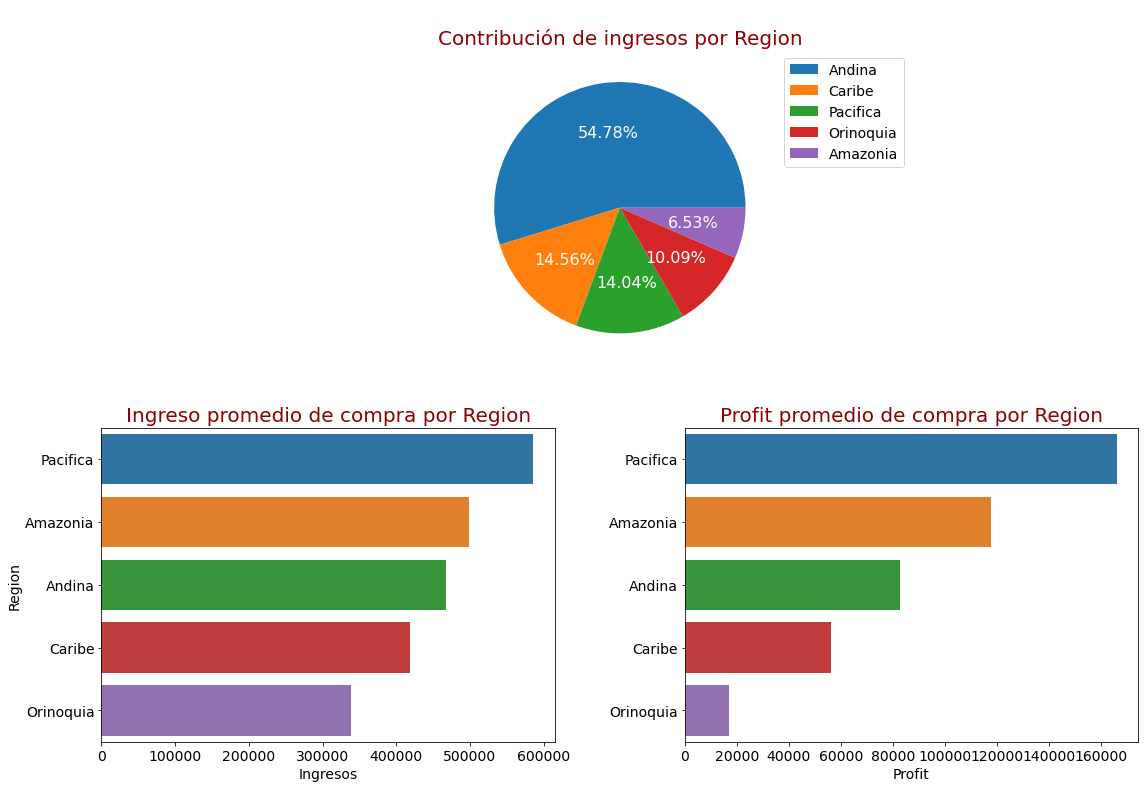

In [26]:
sales_profit(col='Region')

In [27]:
## Inferencia:
## 1) la región "Andina" aporta más del 50% de los ingresos
## 2) Las regiones "Orinoquia" y "Caribe" producen una ganancia promedio por compra significativamente baja. 
##    es necesario realizar más investigaciones

Contribución de ventas por Categoria

Equipo para Comercio    790
Electrodomesticos       264
Industrial              239
Name: Categoria, dtype: int64


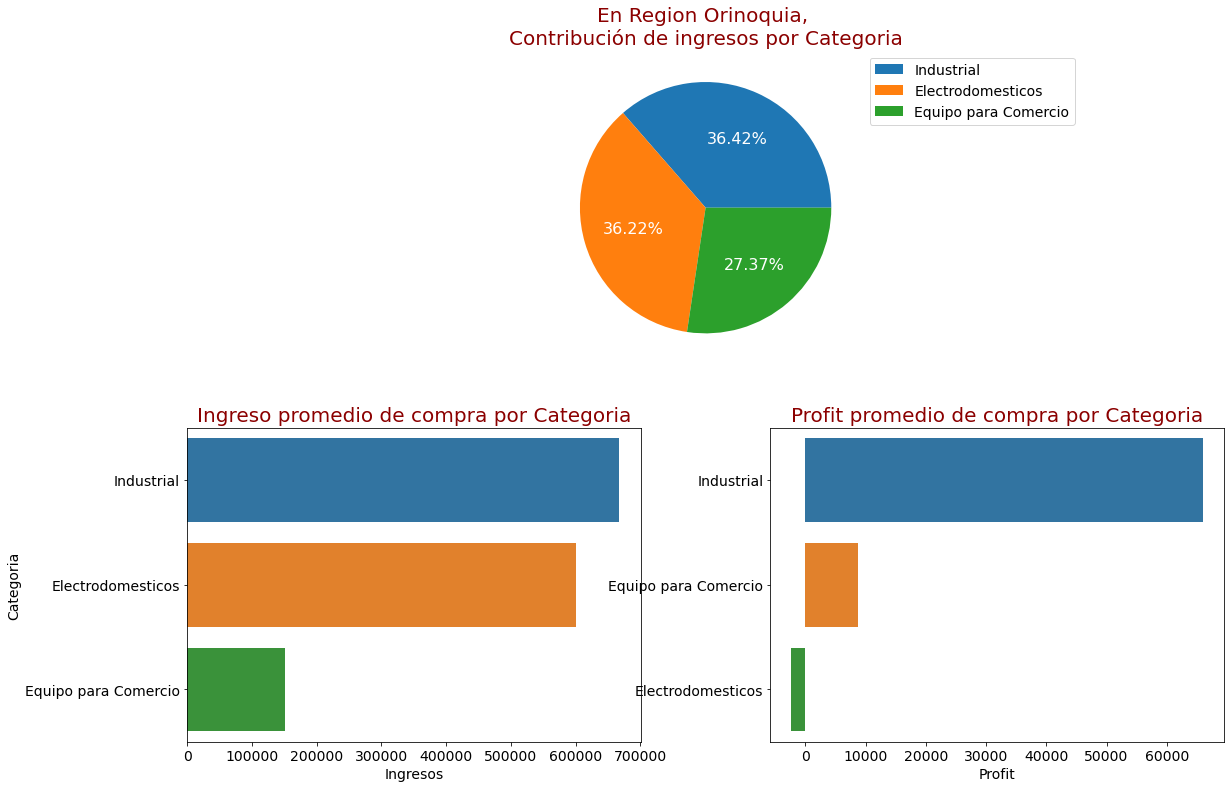

In [28]:
sales_profit(col='Categoria',filter_col='Region',filter_condition='Orinoquia')

In [29]:
## El negocio de los Electrodomésticos que aporta el 36% de la cuota de mercado en la region de la Orinoquia está en pérdidas, 
## lo que lleva a una caída significativa de las ganancias

## Análisis Detallado por Departamento

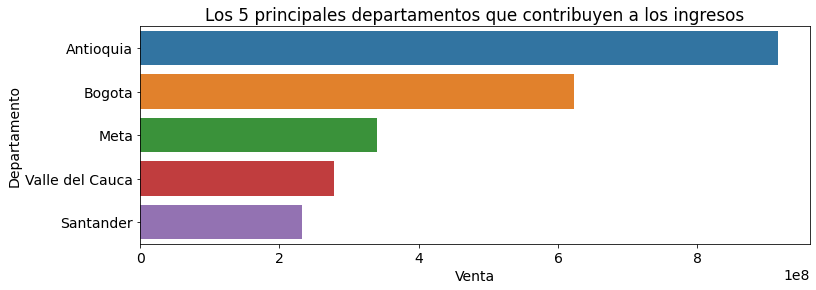

In [30]:
tot_sales_state = (df.groupby('Departamento').Venta.sum().sort_values(ascending=False))
plt.figure(figsize=(12,4))
sns.barplot(x=tot_sales_state.head(),y=tot_sales_state.head().index)
plt.title('Los 5 principales departamentos que contribuyen a los ingresos')
plt.show()

## ¿Qué municipio produce altas ventas y ganancias?

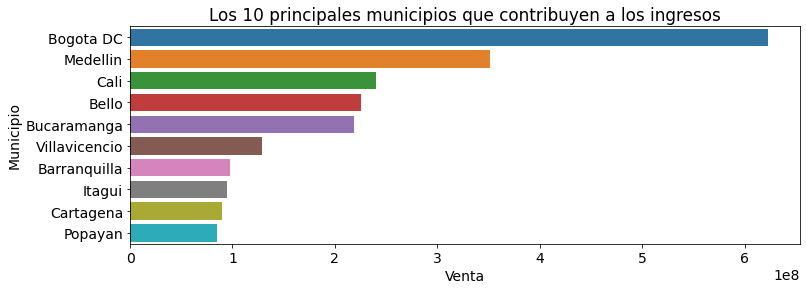

In [31]:
tot_sales_city = (df.groupby('Municipio').Venta.sum().sort_values(ascending=False))
plt.figure(figsize=(12,4))
sns.barplot(x=tot_sales_city.head(10),y=tot_sales_city.head(10).index)
plt.title('Los 10 principales municipios que contribuyen a los ingresos')
plt.show()

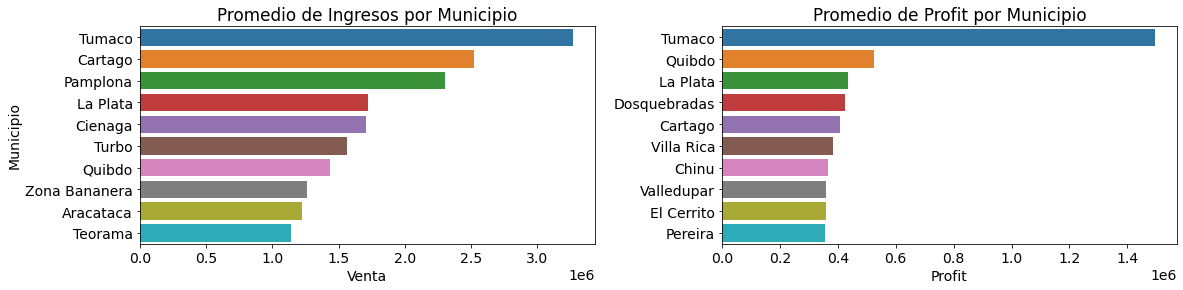

In [32]:
sales_city = (df.groupby('Municipio').Venta.mean().sort_values(ascending=False))
profit_city = (df.groupby('Municipio').Profit.mean().sort_values(ascending=False))

fig = plt.figure(figsize=(16, 4))
gs = fig.add_gridspec(nrows = 1, ncols = 2,  width_ratios=(2, 2),  left=0.05, right=0.95, wspace=0.28)

ax_rev = fig.add_subplot(gs[0, 0])
sns.barplot(x=sales_city.head(10),y=sales_city.head(10).index,ax=ax_rev)
ax_rev.set_title('Promedio de Ingresos por Municipio')

ax_pro = fig.add_subplot(gs[0, 1])
sns.barplot(x=profit_city.head(10),y=profit_city.head(10).index,ax=ax_pro)
ax_pro.set_title('Promedio de Profit por Municipio')
ax_pro.set_ylabel('')

plt.show()

In [33]:
## Inferencia :
## 1) Los principales municipios generadores de ingresos son Bogotá DC, Medellín, Cali, Bello Antioquia y Bucaramanga
## 2) Tumaco, Quibdo, La plata y Cartago parecen ser un buen mercado para apuntar

## ¿El modo de envío tiene relación con las ventas y las ganancias?

Contribución de ventas por Transportadora

Envia+4           5680
Servientrega+3    1806
Envia-3           1486
Servientrega-2     523
Name: Transportadora, dtype: int64


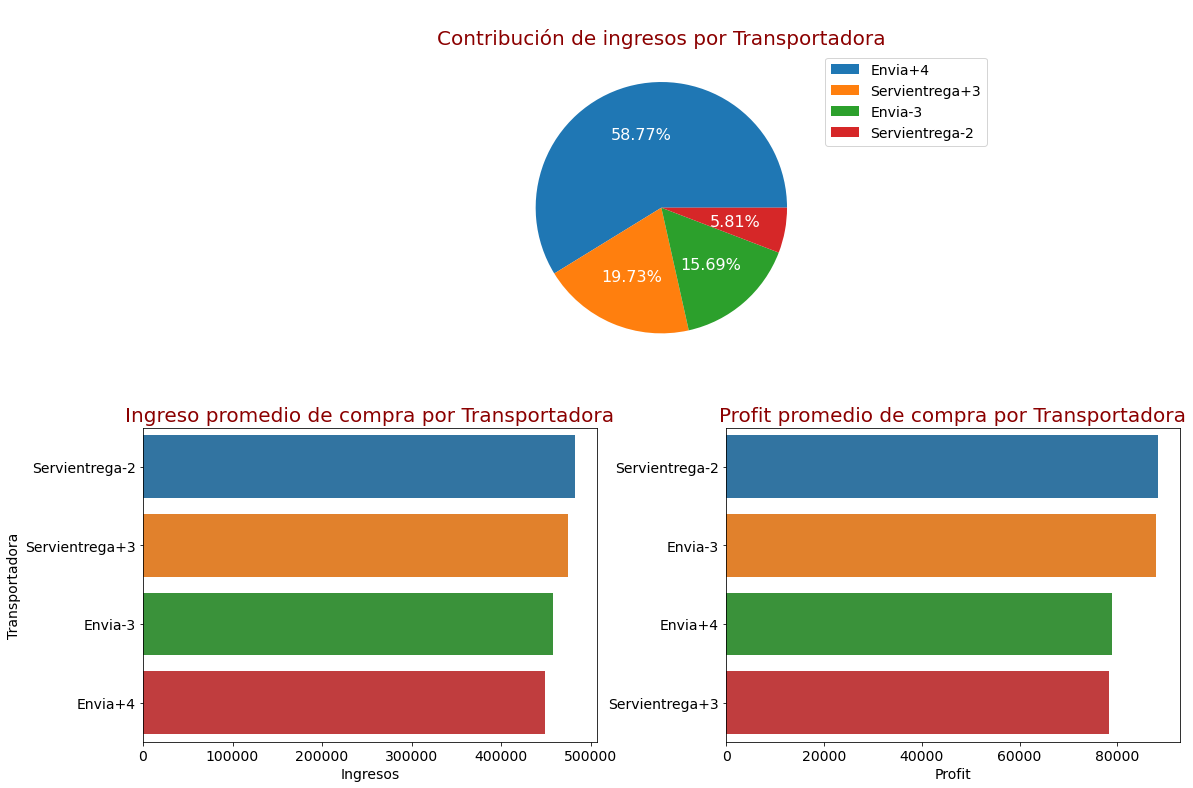

In [34]:
sales_profit('Transportadora')

In [35]:
## Inferencia :
## 1) "Envia+4" es el modo de Envío dominante de Ventas pero tiene la menor contribución a los ingresos promedio 
##     y una baja ganancia por compra
## 2) "Servientrega-2" es la minoría de los modos de envío, representa el 6%, pero tiene el ingreso promedio más alto por compra
## 3) El modo de envío "Servientrega-2" tiene el Profit promedio máximo por compra

## ¿Qué año proporcionó altas ventas y ganancias?

Contribución de ventas por Anyo

Veintiuno     3120
Veinte        2500
Diecinueve    1995
Dieciocho     1880
Name: Anyo, dtype: int64


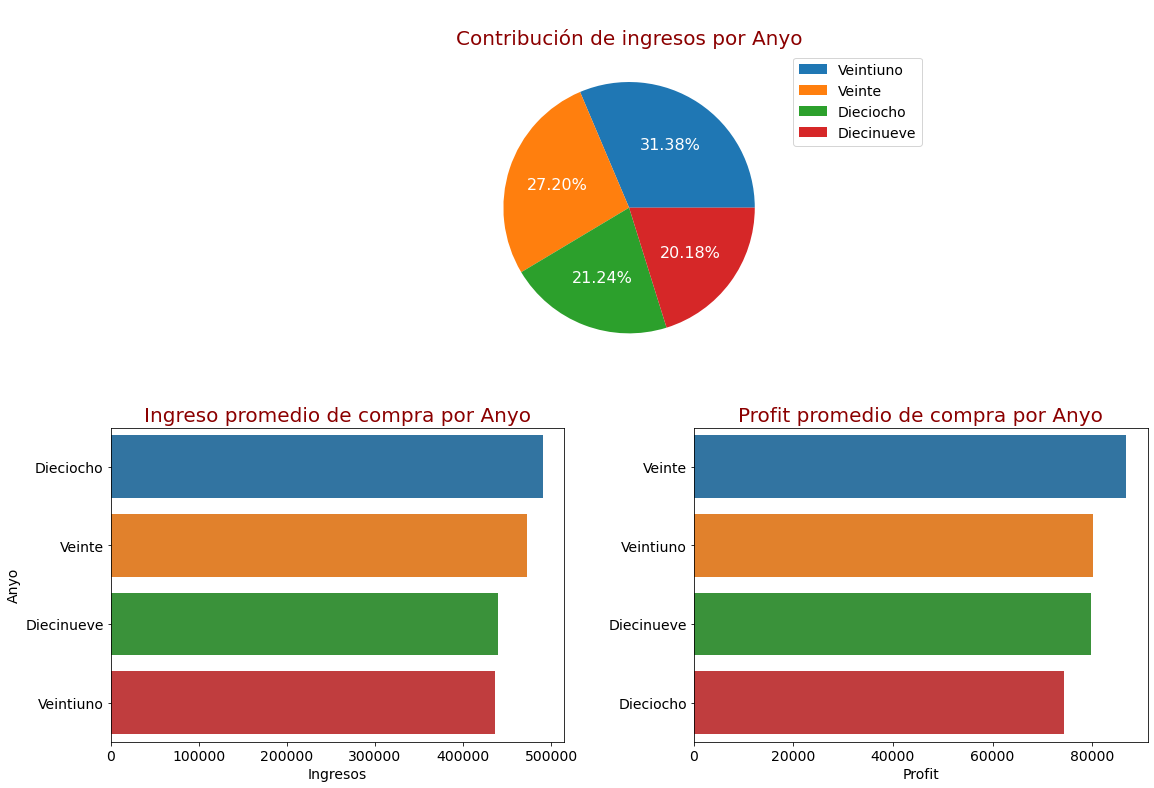

In [36]:
sales_profit('Anyo')

In [37]:
## Inferencia :
## El número de ventas y ganancias para 2020 y 2021 aumentaron considerablemente en comparación con 2018 y 2019

## ¿Qué categoría produce altas ventas y ganancias?

Contribución de ventas por Categoria

Equipo para Comercio    5696
Electrodomesticos       2040
Industrial              1759
Name: Categoria, dtype: int64


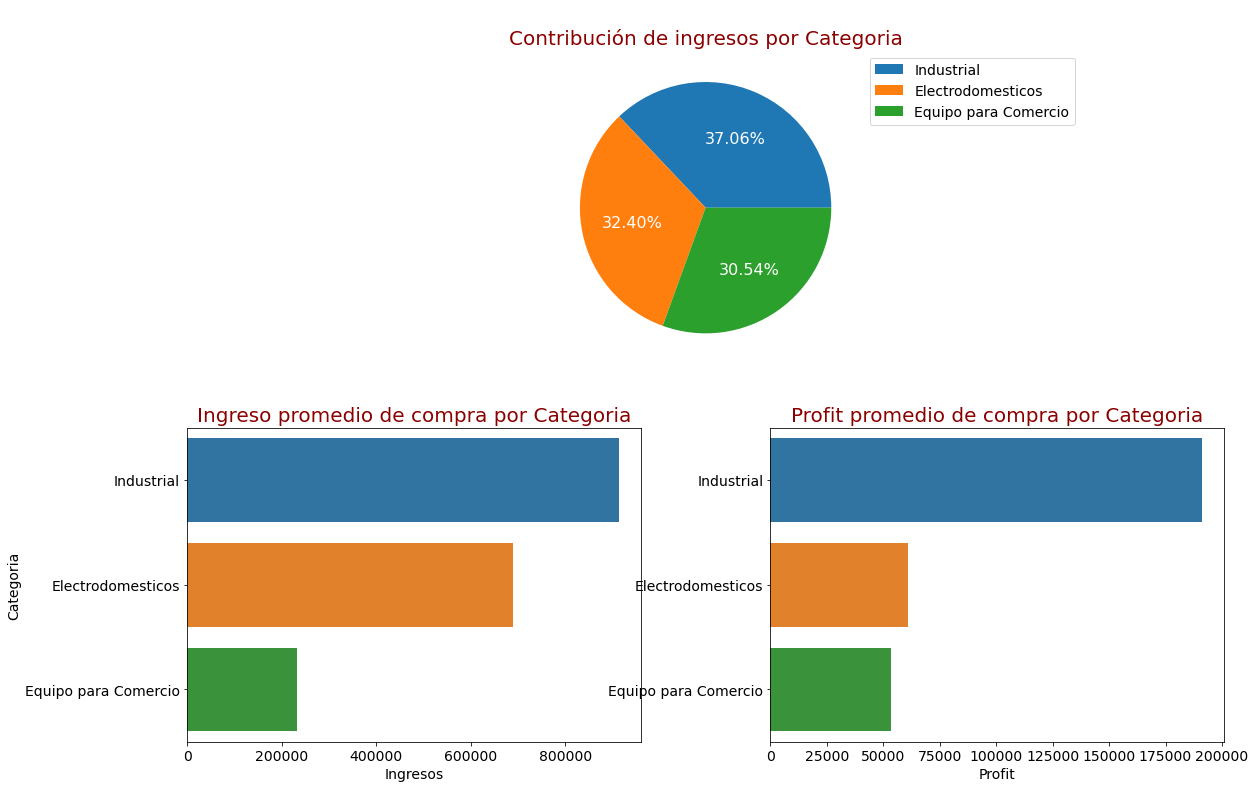

In [38]:
sales_profit('Categoria')

In [39]:
## Inferencia :
## 1) La contribución de los ingresos se distribuye casi por igual entre las categorías
## 2) La categoria "industrial" deja mayores ventas promedio y profit por compra
## 3) Las compras en la categoría "Equipo para Comercio" generan el menor profit promedio

## En Industrial, ¿Qué producto produce altas ventas y ganancias?

Contribución de ventas por Productos

Drones         854
Impresoras     729
Corte laser    113
Proyectores     63
Name: Productos, dtype: int64


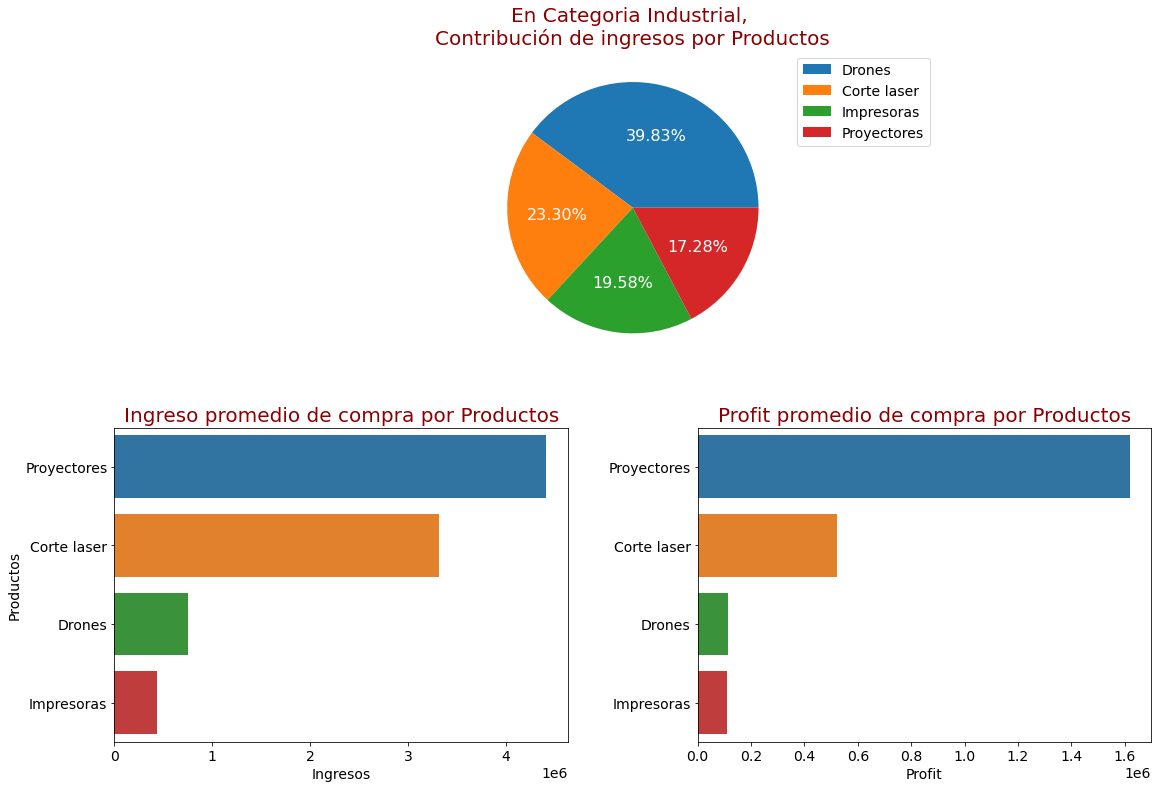

In [40]:
sales_profit(col='Productos',filter_col='Categoria',filter_condition='Industrial')

In [41]:
## Inferencia :
## 1) Los drones son el producto industrial comprado con mayor frecuencia en la tienda
## 2) Sorprendentemente, vender una unidad de proyector da casi 3 veces más ganancias que vender una unidad 
##    de producto de Corte láser y 16 veces más que otras subcategorías en "Industrial"

## Conclusión

## EDA nos ayudó a comprender la información de ventas y nos ayudó a realizar inferencias relacionadas con el negocio para tomar decisiones

Las inferencias importantes son:
    
1. En la Orinoquia, el negocio de Electrodomésticos está en pérdidas y es una preocupación a atender
2. La empresa obtiene altos ingresos de ciudades populares como Bogotá DC, Medellín y Cali, pero los municipios pequeños como Tumaco y Quibdó se muestran prometedores, con altos ingresos promedio y ganancias por compra.
3. Los productos Industriales dan la mejor ganancia promedio por compra
4. En productos Industriales, los Proyectores presentan entre 3 y 16 veces mas de ganancia en comparación con cualquier otra subcategoría
5. La empresa debe promover los modos de envío 'Servientrega-2' para obtener mejores ingresos y ganancias por compra